<a href="https://colab.research.google.com/github/AlexandrEremeev/image_parser/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%BD%D0%B0_%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D0%BA%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Установка Git (если необходимо)
!apt-get update
!apt-get install git -y

# Настройка имени пользователя и email
import os

user_name = "AlexandrEremeev" # Замените на ваше имя
user_email = "a.u.eremeev@mail.ru" # 3aмените на ваш email

os.system(f'git config -- global user.name "{user_name}"')
os.system(f'git config -- global user.email "{user_email}"')

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

32768

In [3]:
from getpass import getpass

# Введите ваш GitHub токен без пробелов
TOKEN = getpass('Введите ваш GitHub токен: ')

# URL вашего репозитория
REPO_URL = "https://github.com/AlexandrEremeev/image_parser.git"

# Клонирование репозитория с использованием токена
!git clone https://{TOKEN}@github.com/AlexandrEremeev/image_parser.git

Введите ваш GitHub токен: ··········
Cloning into 'image_parser'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


## Поиск кружки с помощью canny

In [ ]:
import cv2
import matplotlib

from matplotlib import pyplot as plt

In [ ]:
import numpy as np


In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 10)

In [ ]:
image = cv2.imread('/content/1.jpeg')

In [ ]:
image.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
image = cv2.resize(image, (480, 640))

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


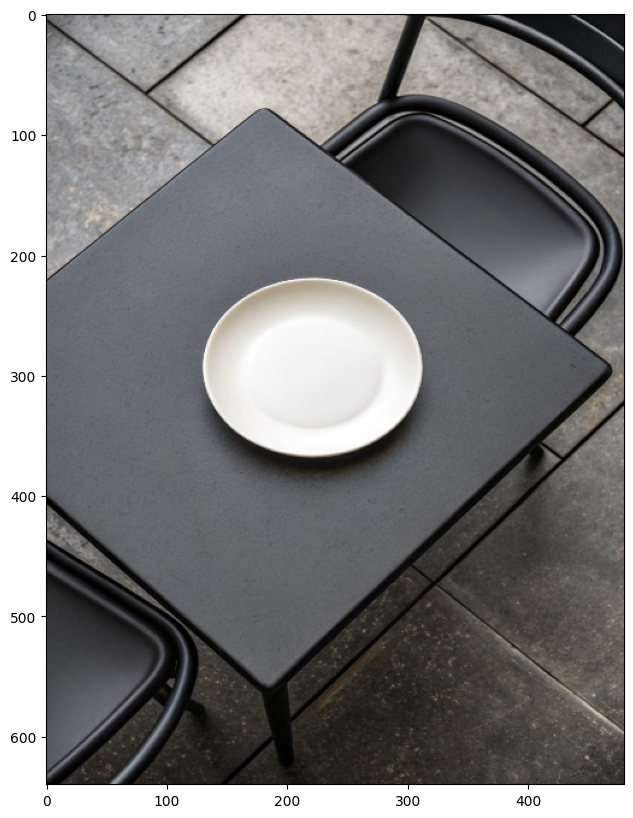

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

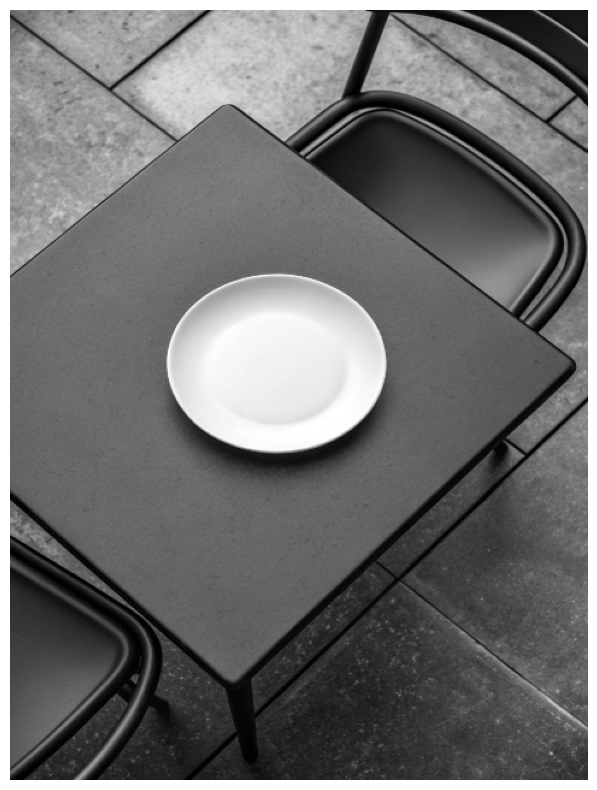

In [ ]:
# Переводим в ч/б
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

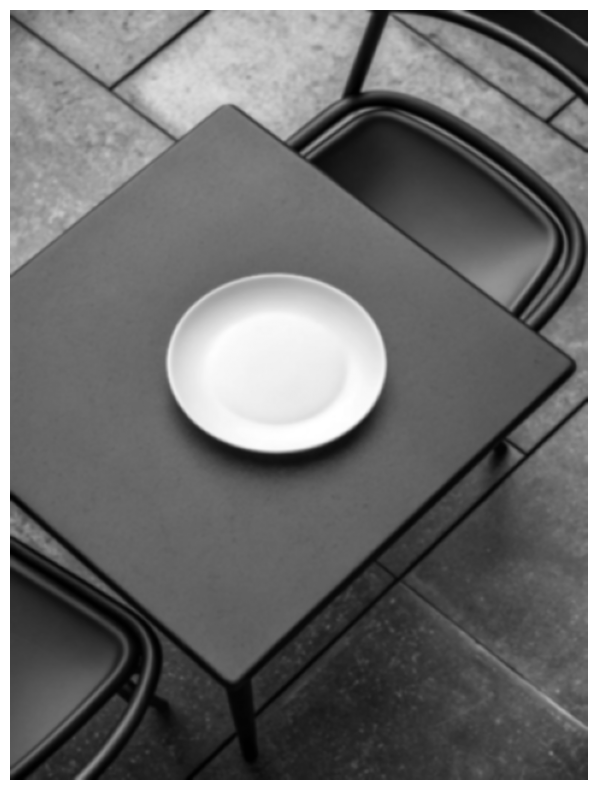

In [ ]:
gray_blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(gray_blurred, cmap='gray')
plt.axis('off')
plt.show()

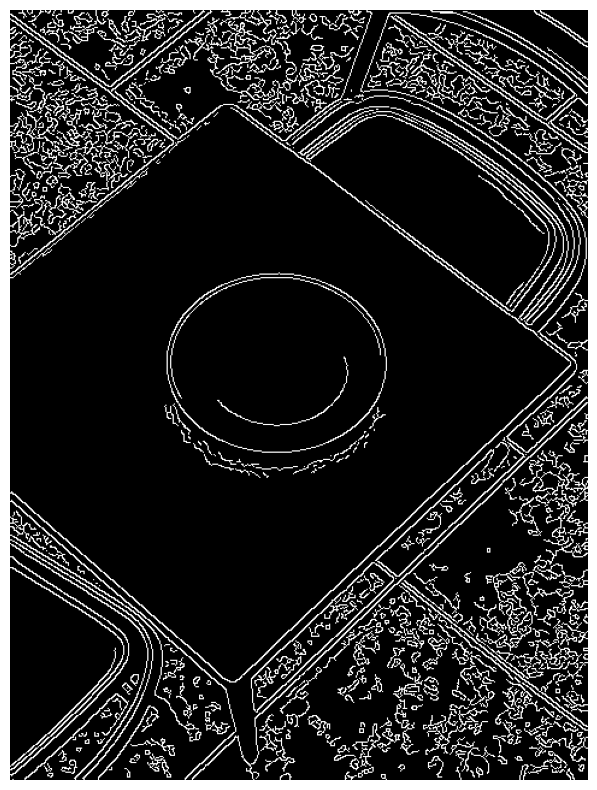

In [ ]:
edged = cv2.Canny(gray_blurred, 10, 50)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# находим контуры

cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts[1]


array([[[308, 636]],

       [[309, 635]],

       [[310, 635]],

       [[311, 636]],

       [[311, 637]],

       [[310, 638]],

       [[309, 638]],

       [[308, 637]]], dtype=int32)

In [ ]:
# Теперь мы хотим найти такие контуры, что приближаются черетыхугольником

cnts = sorted(cnts,
              key = cv2.contourArea, # функция-компоратор
              reverse = True)

solution = None
for c in cnts:
    # считаем пермиметр чтобы задать погрешность
    peri = cv2.arcLength(c, True)
    # считаем аппроксимацию
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        solution = approx
        break

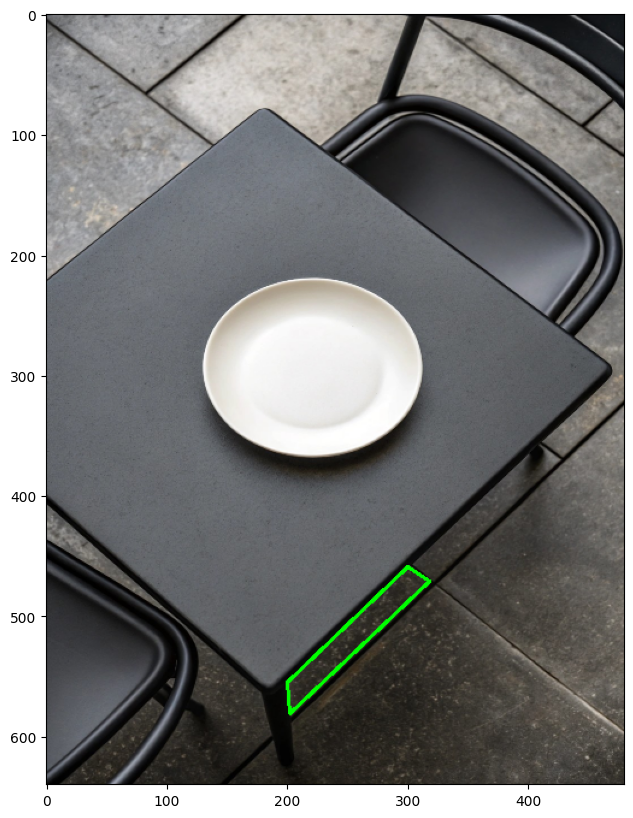

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))

In [ ]:
solution = None
for c in cnts:

    (x, y), radius = cv2.minEnclosingCircle(c)
    circle_area = np.pi * (radius ** 2)
    contour_area = cv2.contourArea(c)

    if contour_area / circle_area > 0.8:
        solution = c
        break

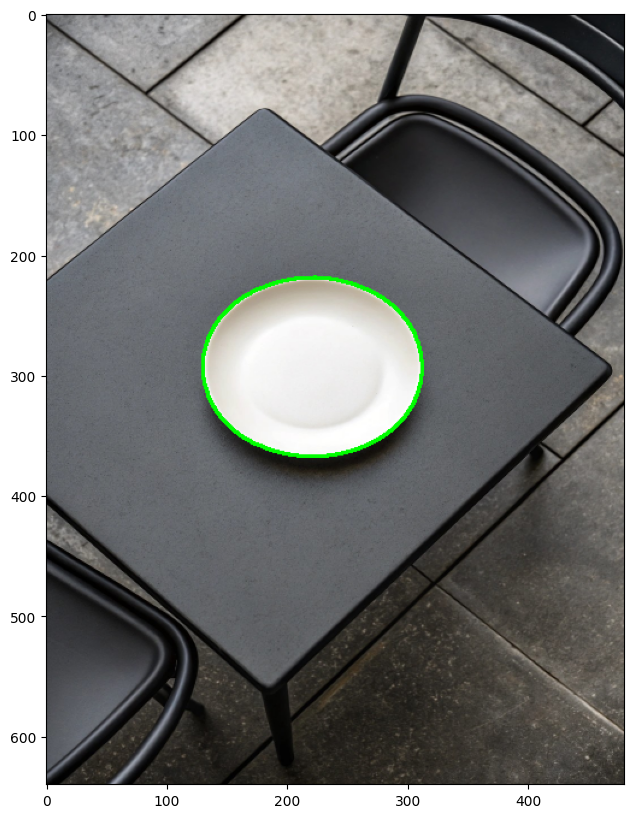

In [ ]:
image_to_draw = image.copy()
cv2.drawContours(image_to_draw, [solution], -1, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_to_draw, cv2.COLOR_BGR2RGB))